In [64]:
#Import needed packages
import requests
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import iqr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
# The following suppresses the use of scientific notation and keeps the precision to a desired number
np.set_printoptions(precision=3, suppress = True)

In [66]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [67]:
#Import housing price dataset
url = ("https://raw.githubusercontent.com/rashida048/Datasets/master/home_data.csv")
data = pd.read_csv(url)

In [68]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [70]:
data['price'] = data['price'].round(decimals=0)

In [71]:
data.shape

(21613, 21)

In [72]:
#Check for null values in entire dataset

print(data.isnull().values.any())

False


In [73]:
print(f"AVG House Price: ${round(data['price'].mean(),2)}")
print(f"MED House Price: ${round(data['price'].median(),2)}")

print(f"MIN House Price: ${data['price'].min()}")
print(f"MAX House Price: ${data['price'].max()}")

AVG House Price: $540088.14
MED House Price: $450000.0
MIN House Price: $75000
MAX House Price: $7700000


In [74]:
print(f"MAX Bedrooms: {data['bedrooms'].max()}")
print(f"MIN Bedrooms: {data['bedrooms'].min()}")

MAX Bedrooms: 33
MIN Bedrooms: 0


In [75]:
print(f"MAX Year Built: {data['yr_built'].max()}")
print(f"MIN Year Built: {data['yr_built'].min()}")

MAX Year Built: 2015
MIN Year Built: 1900


In [76]:
data['price'].describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean      540088.141905
std       367127.195968
min        75000.000000
25%       321950.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

In [77]:
iqr(data['price'])

323050.0

Text(0.5, 1.0, 'Boxplot of Home Prices')

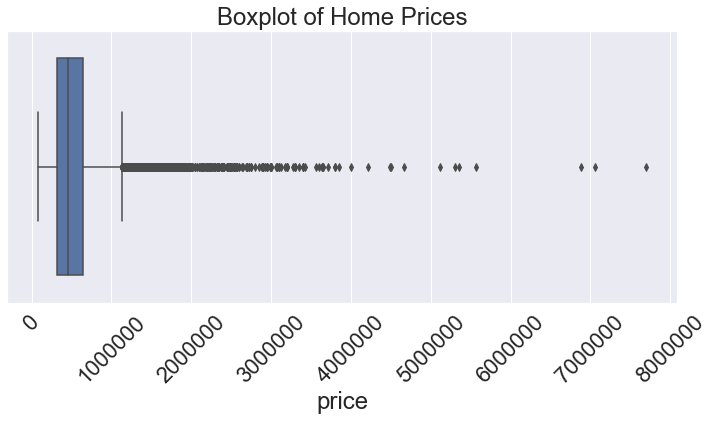

In [78]:
plt.figure(figsize=(12,5))
sns.boxplot(x =data['price'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Home Prices')

Text(0.5, 1.0, 'Histogram of Home Prices')

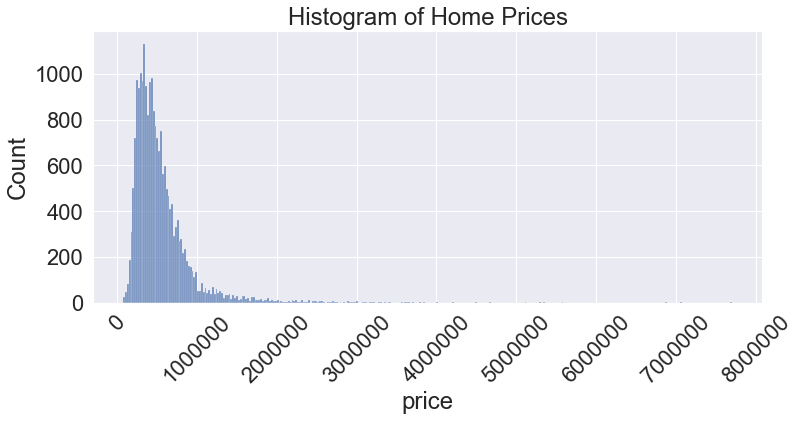

In [79]:
plt.figure(figsize=(12,5))
sns.histplot(x=data['price'])
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Histogram of Home Prices')

Both the boxplot and the histogram of house sale prices show a heavily skewed distribution and so our target variable is not normally distributed.

In [80]:
data['sqft_living'].describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [81]:
iqr(data['sqft_living'])

1123.0

In [82]:
#Let's make a scatterplot showing house price x # of bedrooms

sns.set_style('whitegrid')
sns.set_context('poster')

Text(0.5, 1.0, 'Relationship b/w Price and Square Footage')

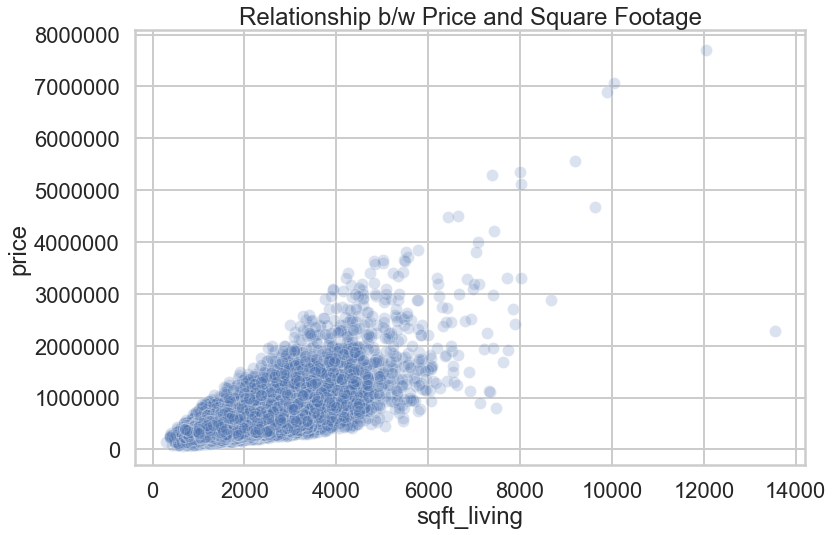

In [83]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y=data['price'], x=data['sqft_living'], alpha=0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Relationship b/w Price and Square Footage')

In [84]:
# Try a lineplot of price by when house was built

yr_data = data[['price','yr_built']]

#aggregate house by decade built
decades = yr_data.groupby((yr_data.yr_built//10)*10)['price'].median()
decades = decades.reset_index()
decades = decades.round(decimals=0)

In [85]:
decades

,yr_built,price
0,1900,550000.0
1,1910,510750.0
2,1920,535000.0
3,1930,474000.0
4,1940,389000.0
5,1950,400000.0
6,1960,379975.0
7,1970,436500.0
8,1980,450000.0
9,1990,486388.0


Text(0.5, 1.0, 'Median Home Price By Decade')

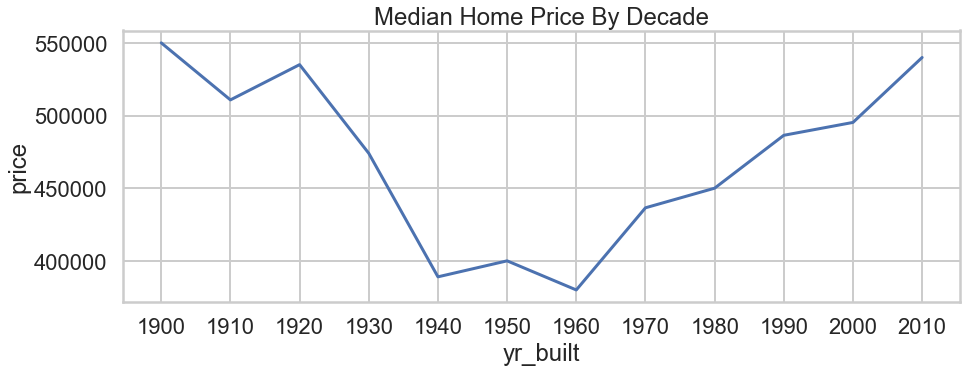

In [86]:
plt.figure(figsize=(15,5))
sns.lineplot(x ="yr_built", y ="price", data = decades)
plt.xticks([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
plt.title('Median Home Price By Decade')

Text(0.5, 1.0, 'Frequency of Houses By Year Built')

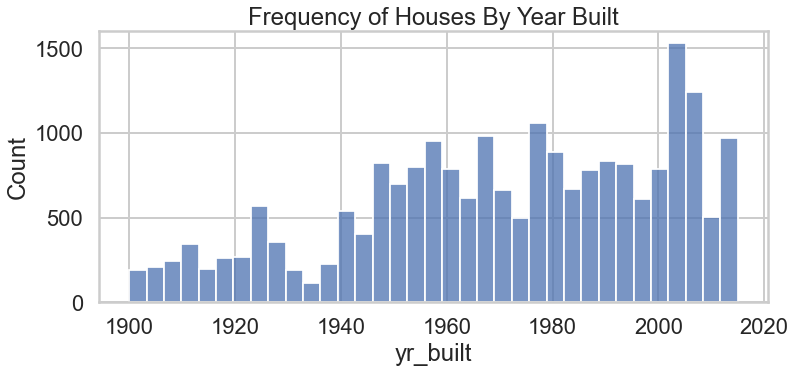

In [87]:
#How many houses were built in each year?

plt.figure(figsize=(12,5))
sns.histplot(data=data, x='yr_built')
plt.title('Frequency of Houses By Year Built')

Text(0.5, 1.0, 'Price By Condition of House')

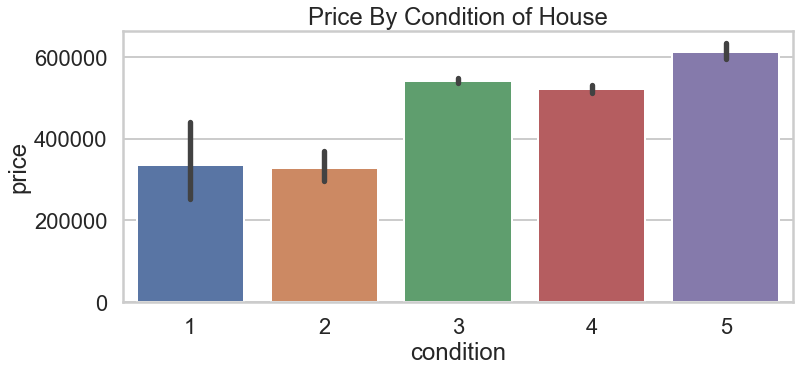

In [88]:
#What does the condition mean for pricing?

plt.figure(figsize=(12,5))
sns.barplot(x = 'condition', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Price By Condition of House')

Text(0.5, 1.0, 'Condition Frequency')

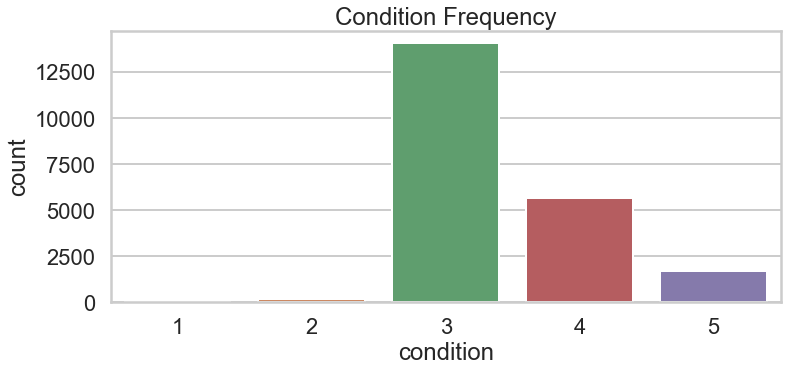

In [89]:
#What does the condition distribution look like?

plt.figure(figsize=(12,5))
sns.countplot(data=data, x='condition')
plt.title('Condition Frequency')

In [90]:
#How many properties have waterfront? 0=No, 1=Yes

data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [91]:
#Calculate percentages

df1 = (data['waterfront'].value_counts(normalize=True)
       .mul(100)
       .rename_axis('waterfront')
       .reset_index(name='percentage'))
print (df1)

   waterfront  percentage
0           0   99.245824
1           1    0.754176


Text(0.5, 1.0, 'Waterfront?')

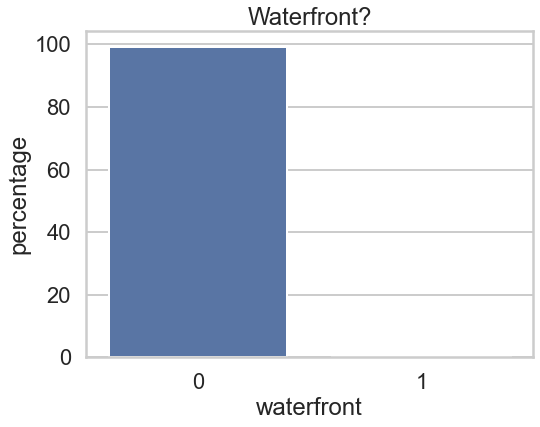

In [92]:
#Graph this

plt.figure(figsize=(8,6))
sns.barplot(x='waterfront', y='percentage', data=df1)
plt.title('Waterfront?')

In [93]:
#Make a correlation matrix to see if any features are correlated

corrMatrix = data.corr()

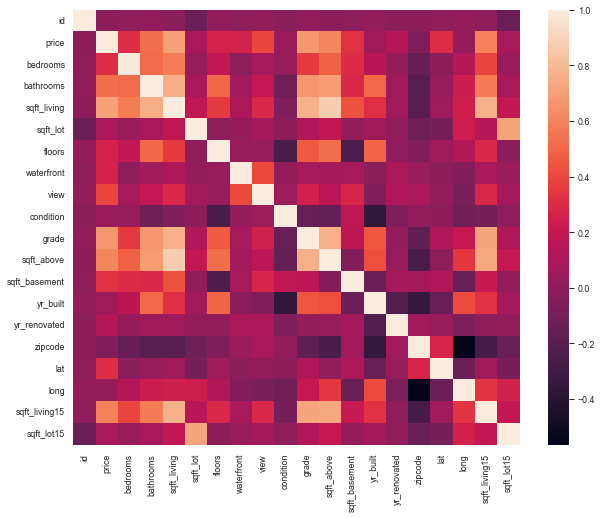

In [94]:
#Make a heatmap version
sns.set_context('paper')
plt.figure(figsize=(10,8))
sns.heatmap(corrMatrix, annot=False)
plt.show()

NOTES:

Sqft_above and sqft_living are very strongly correlated.
Looks like condition is strongly correlated with year house was built.
Disregard lat and long and id


In [95]:
#Want a heatmap that shows all the predictor variables against the target variable though...

data.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


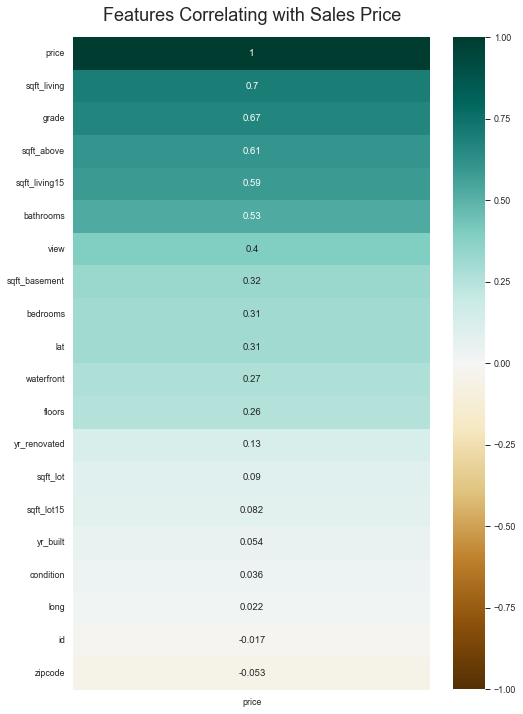

In [96]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [97]:
#Can you we list correlations in order of strength positive to negative?

sorted_matrix = corrMatrix.unstack().sort_values()

In [98]:
sorted_matrix

zipcode       long           -0.564072
long          zipcode        -0.564072
yr_built      condition      -0.361417
condition     yr_built       -0.361417
zipcode       yr_built       -0.346869
                                ...   
yr_renovated  yr_renovated    1.000000
zipcode       zipcode         1.000000
lat           lat             1.000000
condition     condition       1.000000
sqft_lot15    sqft_lot15      1.000000
Length: 400, dtype: float64

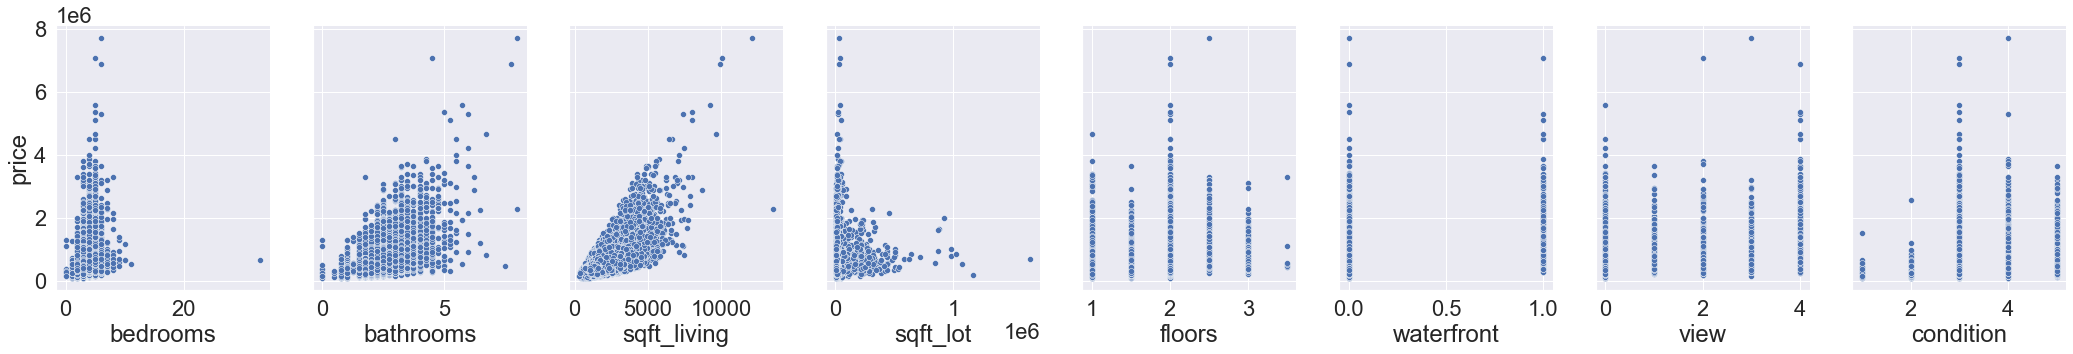

In [99]:
#Pairplot
sns.set(font_scale = 2)
pplot = sns.PairGrid(data=data, y_vars=['price'], x_vars=['bedrooms', 'bathrooms', 'sqft_living',
                                                          'sqft_lot', 'floors', 'waterfront', 'view', 'condition'], height=5, aspect=0.75)
pplot.map(sns.scatterplot)
plt.show()

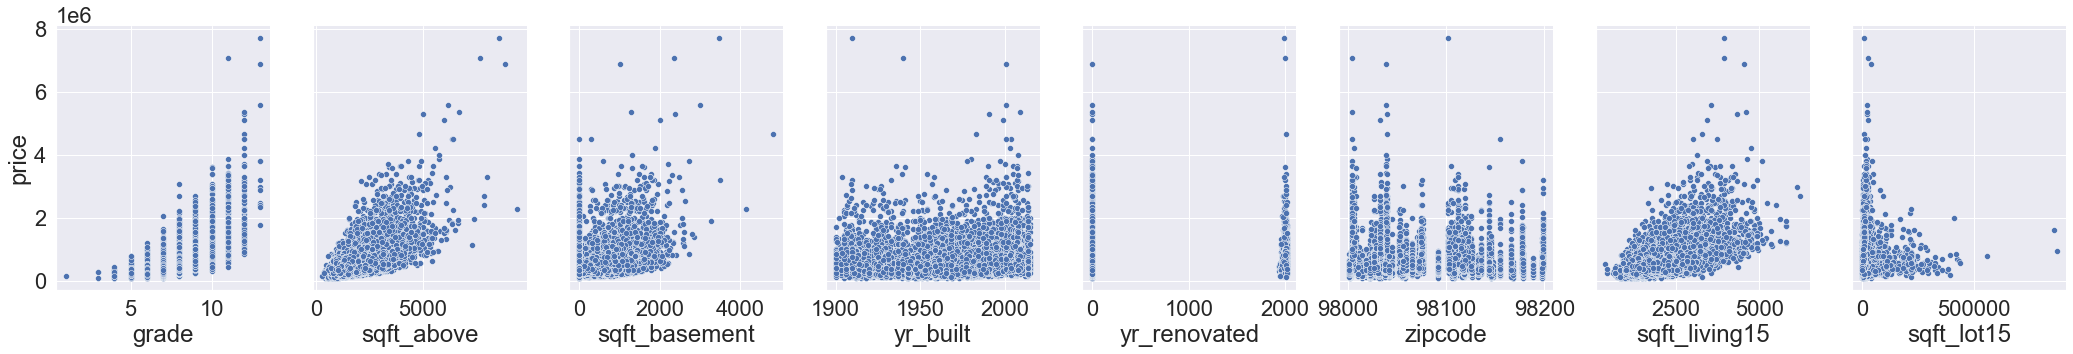

In [100]:
#Pairplot2

pplot2 = sns.PairGrid(data=data, y_vars=['price'], x_vars=['grade',
                                                          'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                                                          'sqft_living15', 'sqft_lot15'], height=5, aspect=0.75)
pplot2.map(sns.scatterplot)
plt.show()

Let's run this data through a multiple linear regression model to see what features are important for predicting house sale prices and whether the data allows good prediction with a linear model.

In [101]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
# Split the data
#REMOVED 'sqft_above','sqft_living15','sqft_lot15'

from sklearn.model_selection import train_test_split

x = data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_basement','yr_built','yr_renovated','zipcode']]

y = data['price']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [104]:
x_train.shape

(17290, 13)

In [105]:
x_test.shape

(4323, 13)

In [106]:
# Import & train the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(normalize=True).fit(x_train, y_train)

In [107]:
# The following gives the parameters of the model
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': True,
 'positive': False}

In [108]:
# Training R-square

("R-square for the training set is = ", format(lr.score(x_train, y_train), '.3f'))

('R-square for the training set is = ', '0.654')

In [109]:
# Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), x_train, y_train, cv=5, scoring='r2')
print(cv_scores)

[0.648 0.613 0.656 0.665 0.657]


In [110]:
# CV Mean

np.mean(cv_scores)

0.6478449013403248

In [111]:
# Prediction

pred = lr.predict(x_test)

In [112]:
pred.shape

(4323,)

In [113]:
# Test R-Square

from sklearn.metrics import r2_score

("R-square for the test set is = ",format(r2_score(y_test, pred), '.3f'))

('R-square for the test set is = ', '0.645')

In [114]:
# The coefficients

from sklearn.metrics import mean_squared_error, r2_score

#Coefficients of the regression model
print("Model coefficients are = ", lr.coef_, '.3f')

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, pred))

Model coefficients are =  [-37268.764  43587.024    174.202     -0.262  26435.061 595624.652
  45434.88   18637.291 122571.766      1.615  -3569.985      8.443
      2.17 ] .3f
Mean squared error: 42200337287.04
Coefficient of determination: 0.65


In [115]:
predictors = x_train.columns

Feature: bedrooms, Score: -37268.76388
Feature: bathrooms, Score: 43587.02375
Feature: sqft_living, Score: 174.20155
Feature: sqft_lot, Score: -0.26230
Feature: floors, Score: 26435.06097
Feature: waterfront, Score: 595624.65185
Feature: view, Score: 45434.87951
Feature: condition, Score: 18637.29064
Feature: grade, Score: 122571.76574
Feature: sqft_basement, Score: 1.61459
Feature: yr_built, Score: -3569.98520
Feature: yr_renovated, Score: 8.44268
Feature: zipcode, Score: 2.16982


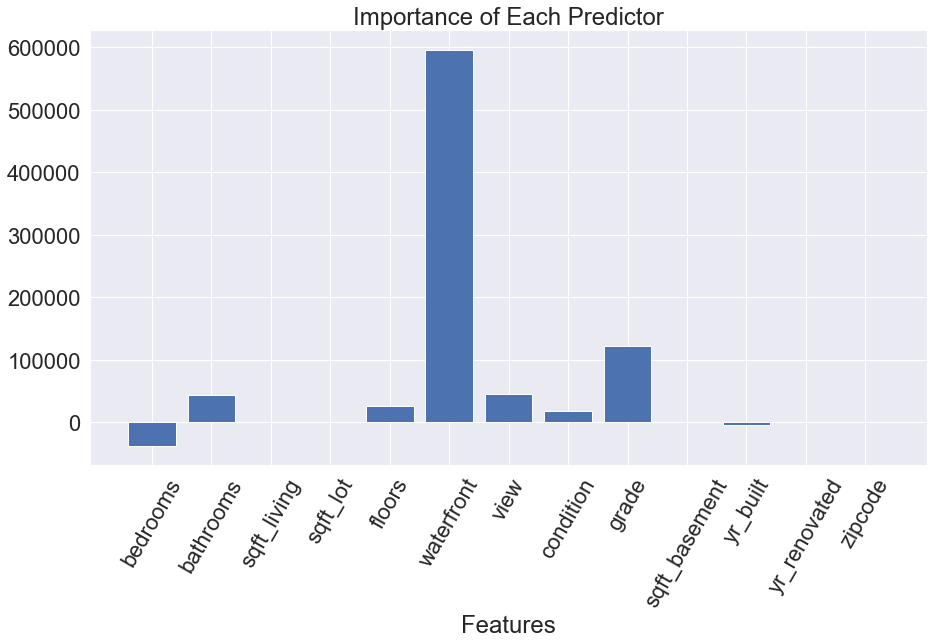

In [116]:
# get importance
importance = lr.coef_

# summarize feature importance
for i,v in enumerate(importance):
       print('Feature: %s, Score: %.5f' % (predictors[i],v))

# plot feature importance
fig,ax = plt.subplots(figsize = (15, 8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(predictors)), predictors, rotation=60)
plt.xlabel('Features')
plt.title('Importance of Each Predictor')
plt.show()

Try a Random Forest Regressor instead as it is non-parametric, better with outliers, and can deal with inter-dependent variables.

In [124]:
# Import & train the model

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=5, min_samples_split=10)

rf.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=5, min_samples_split=10)

In [125]:
# The following gives the parameters of the model
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [126]:
# Cross Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RandomForestRegressor(), x_train, y_train, cv=5, scoring='r2')
print(cv_scores)

[0.782 0.773 0.779 0.818 0.814]


In [127]:
# CV Mean

np.mean(cv_scores)

0.7931752511836534

In [128]:
# Prediction

pred = rf.predict(x_test)

In [129]:
# Accuracy score

print("Accuracy on training set: {:.3f}".format(rf.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(x_test, y_test)))

Accuracy on training set: 0.900
Accuracy on test set: 0.812


In [130]:
# MSE

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))

Mean squared error: 22349252005.76
